In [2]:
#import pandas, numpy, matplotlib, and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#import the data and take a look
df = pd.read_csv('QBStats_2016.csv')
df.head()

,qb,att,cmp,yds,ypa,td,int,lg,sack,loss,rate,game_points,home_away,year
0,Jameis WinstonJ. Winston,32,23,281,8.8,4,1,45t,0,0,125.1,31,away,2016
1,Matt RyanM. Ryan,39,27,334,8.6,2,0,59,3,12,112.6,24,home,2016
2,Shaun HillS. Hill,33,18,236,7.2,0,0,33,0,0,77.3,25,away,2016
3,Marcus MariotaM. Mariota,41,25,271,6.6,2,1,29,2,19,86.5,16,home,2016
4,Robert Griffin IIIR. Griffin,26,12,190,7.3,0,1,58,3,22,55.0,10,away,2016


In [5]:
#look at aggregate counts stats by player
passing_tds = df.groupby('qb')['td'].sum()
passing_tds

qb
Aaron RodgersA. Rodgers                40
Alex SmithA. Smith                     15
Andrew LuckA. Luck                     31
Andy DaltonA. Dalton                   18
Antonio MorrisonA. Morrison             0
Ben RoethlisbergerB. Roethlisberger    29
Blaine GabbertB. Gabbert                5
Blake BortlesB. Bortles                23
Brett HundleyB. Hundley                 0
Brian HoyerB. Hoyer                     6
Brock OsweilerB. Osweiler              15
Bryce PettyB. Petty                     3
Cam NewtonC. Newton                    18
Cameron MeredithC. Meredith             1
Cardale JonesC. Jones                   0
Carson PalmerC. Palmer                 26
Carson WentzC. Wentz                   16
Case KeenumC. Keenum                    9
Charlie WhitehurstC. Whitehurst         1
Chase DanielC. Daniel                   0
Cody KesslerC. Kessler                  6
Cole BeasleyC. Beasley                  0
Colin KaepernickC. Kaepernick          16
Connor CookC. Cook             

In [7]:
#want to see who the top ten players are
top_ten_passing_tds = df.groupby('qb')['td'].sum().sort_values(ascending = False)[:10]
top_ten_passing_tds

qb
Aaron RodgersA. Rodgers                40
Matt RyanM. Ryan                       38
Drew BreesD. Brees                     37
Philip RiversP. Rivers                 33
Andrew LuckA. Luck                     31
Ben RoethlisbergerB. Roethlisberger    29
Jameis WinstonJ. Winston               28
Tom BradyT. Brady                      28
Derek CarrD. Carr                      28
Marcus MariotaM. Mariota               26
Name: td, dtype: int64

In [9]:
#not sure this is a great data set for what i'm trying to do. lets try another

In [31]:
#import the data and take a look
df = pd.read_csv('NFL Team Season Stats - Passing.csv')
df.head()

#much better, moving forward with this

,YEAR,Team,GP,Comp,Att,Pct,Yds,Avg,Yds/G,TD,Int,QBR,Lng
0,2002,ARZ,16,291,548,0.531,2740,5.0,171.3,18,22,63.7,80
1,2003,ARZ,16,303,534,0.567,2959,5.5,184.9,18,22,68.9,71
2,2004,ARZ,16,299,533,0.561,2882,5.4,180.1,14,18,68.5,48
3,2005,ARZ,16,419,670,0.625,4437,6.6,277.3,21,21,81.0,63
4,2006,ARZ,16,322,545,0.591,3662,6.7,228.9,17,17,78.7,64


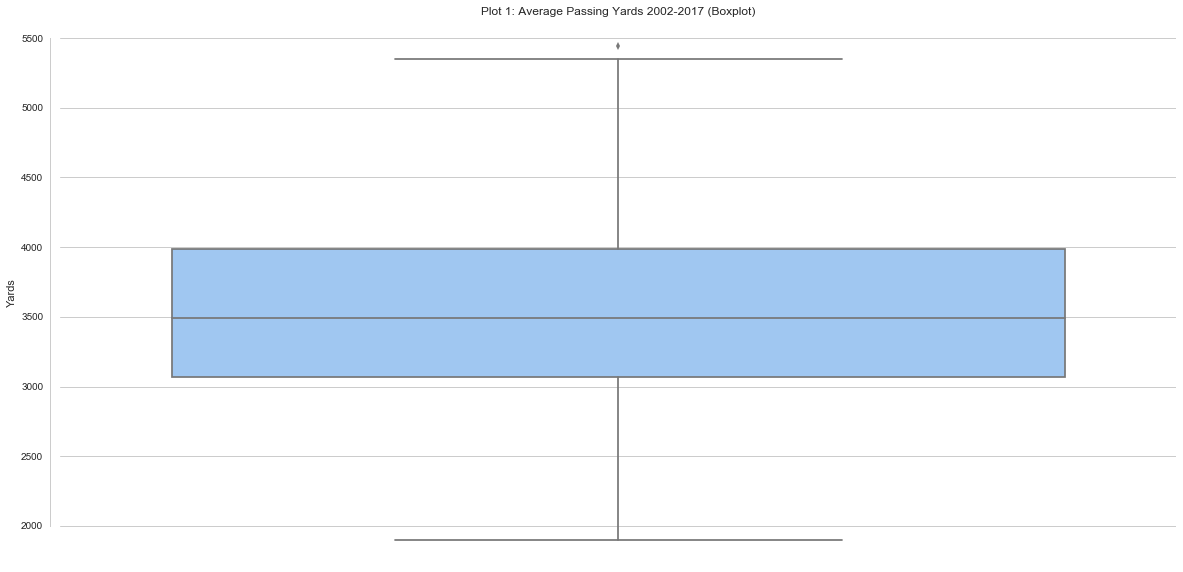

In [77]:
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")

ax = sns.boxplot(y='Yds', data=df, palette='pastel')  

plt.title('Plot 1: Average Passing Yards 2002-2017 (Boxplot)')

sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='Yards')

plt.show()

#Here we are looking at the average amount of passing yards per season in the NFL between 2002 and 2017.
#Looks like the sweet spot is between 3k and 4k yards with the big season approaching 5.5k.
#Unfortunately this doesn't give us much insight into how the game may have changed over this 15 year period.

[Text(0,0.5,'Yards'), Text(0.5,0,'Year')]

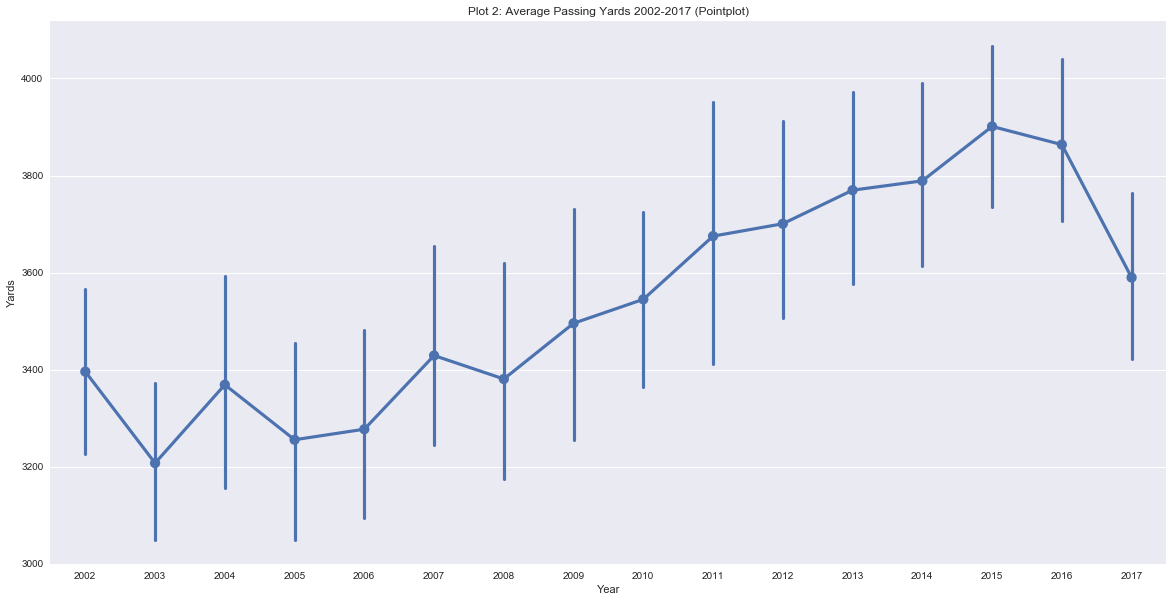

In [76]:
plt.figure(figsize=(20,10))
sns.set(style="darkgrid")
ax = sns.pointplot(x="YEAR", y="Yds", data=df)
plt.title('Plot 2: Average Passing Yards 2002-2017 (Pointplot)')
ax.set(xlabel='Year', ylabel='Yards')

#Playing off of my last thought, I wanted to see how the passing game has evolved over the last fifteen years
#Media-types often talk about the game trending towards more passing and that seems to be confirmed in the below
#2017 represents an interesting dip in the trend, and potential future research might be analyzing
#a potential bump in average rushing yards in 2017

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[Text(17.2,0.5,'Yards'), Text(0.5,-13.8,'')]

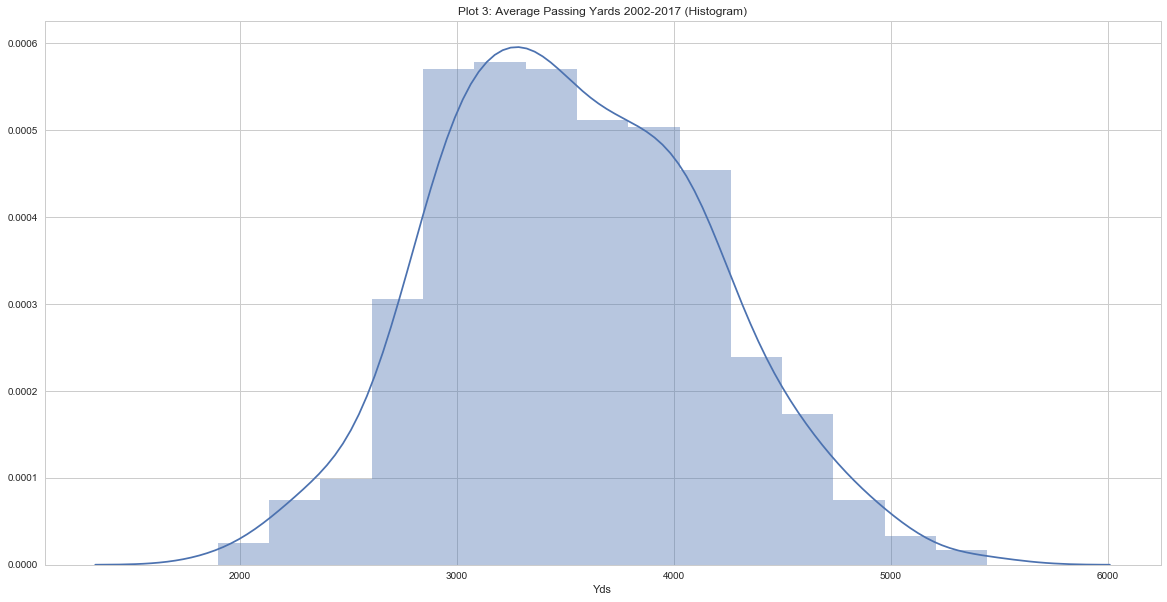

In [78]:
plt.figure(figsize=(20,10))
sns.distplot(df["Yds"], bins=15)

plt.title('Plot 3: Average Passing Yards 2002-2017 (Histogram)')
ax.set(xlabel='', ylabel='Yards')

#Here we have an opportunity to further explore the distribution of annual yardage totals across the data

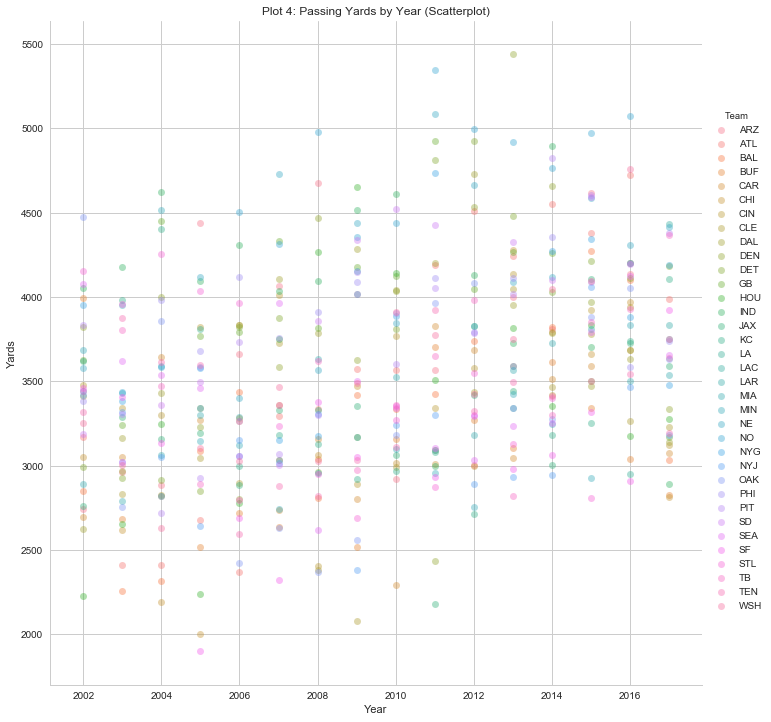

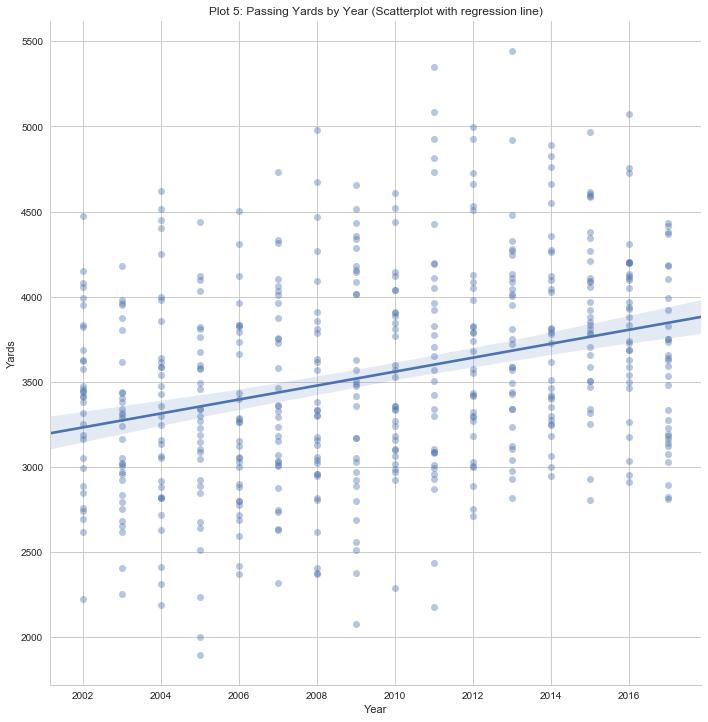

In [79]:
g = sns.lmplot(y='Yds',
               x='YEAR',
               data=df,
               size=10,
               hue='Team',
               fit_reg=False,
               scatter_kws={'alpha':0.4}) # Set points to semi-transparent to see overlaping points.
g.set_ylabels("Yards")
g.set_xlabels("Year")
plt.title('Plot 4: Passing Yards by Year (Scatterplot)')
plt.show()

g = sns.lmplot(y='Yds', 
               x='YEAR',
               data=df,
               size=10,
               fit_reg=True, # The regression line also includes a 95% confidence envelope.
               scatter_kws={'alpha':0.4})
g.set_ylabels("Yards")
g.set_xlabels("Year")
plt.title('Plot 5: Passing Yards by Year (Scatterplot with regression line)')
plt.show()

#Here I'd like to take a look at the distribution of Passing Yards by Year per team.
#This shows all of the information I'm looking for, but readability is a bit of a challenge

#The second plot adds a regression line so we can get a better sense of the general trend over time

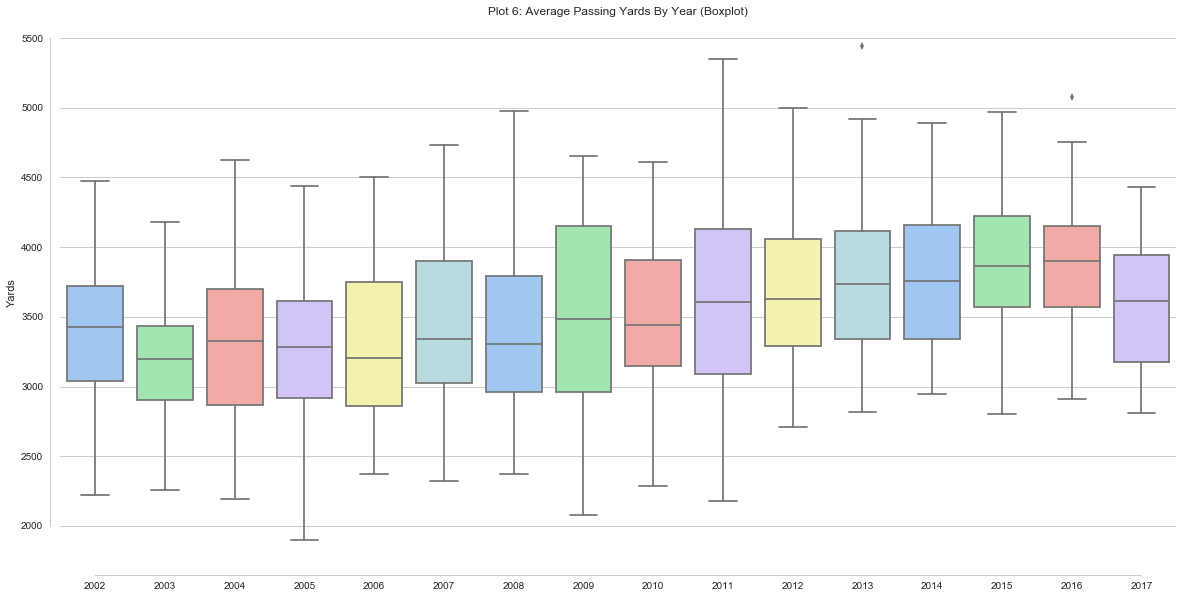

In [81]:
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")

ax = sns.boxplot(x='YEAR', y='Yds', data=df, palette='pastel')  

plt.title('Plot 6: Average Passing Yards By Year (Boxplot)')

sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='Yards')

plt.show()

#Further exploring how this trend changes over time

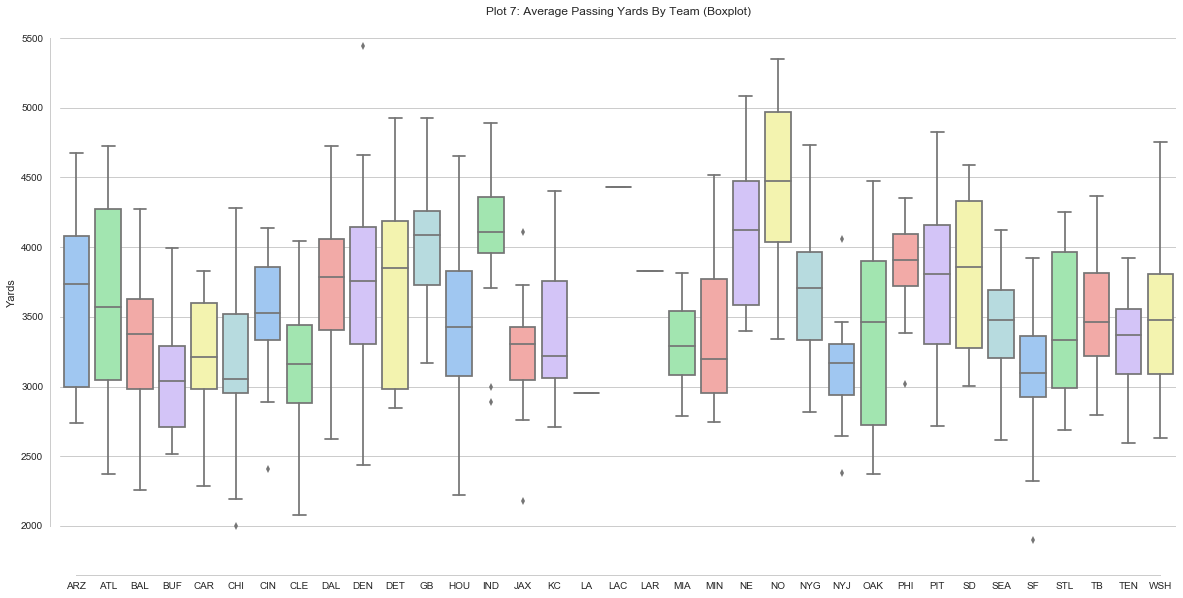

In [83]:
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")

ax = sns.boxplot(x='Team', y='Yds', data=df, palette='pastel')  

plt.title('Plot 7: Average Passing Yards By Team (Boxplot)')

sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='Yards')

plt.show()

#I was curious to see which teams trend towards a stronger passing game
#Unsurprisngly, New Orleans lead the pack when it comes to slinging the rock
#Peyton Manning's 2013 season in Denver still dwarves most other statistical seasons from a yardage standpoint

#Notice the weird data around LA, LAC, and LAR. This has something to do with the team's respective moves from
#San Diego and St. Louis

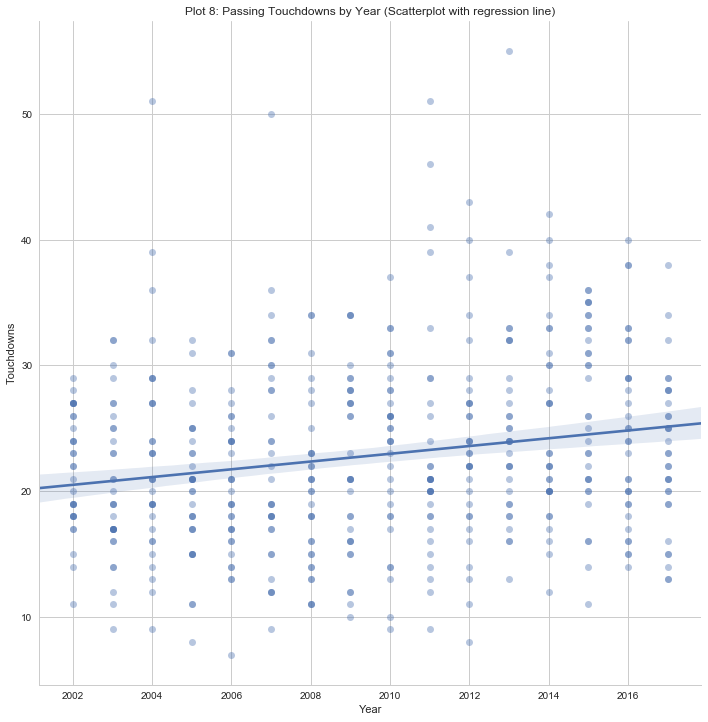

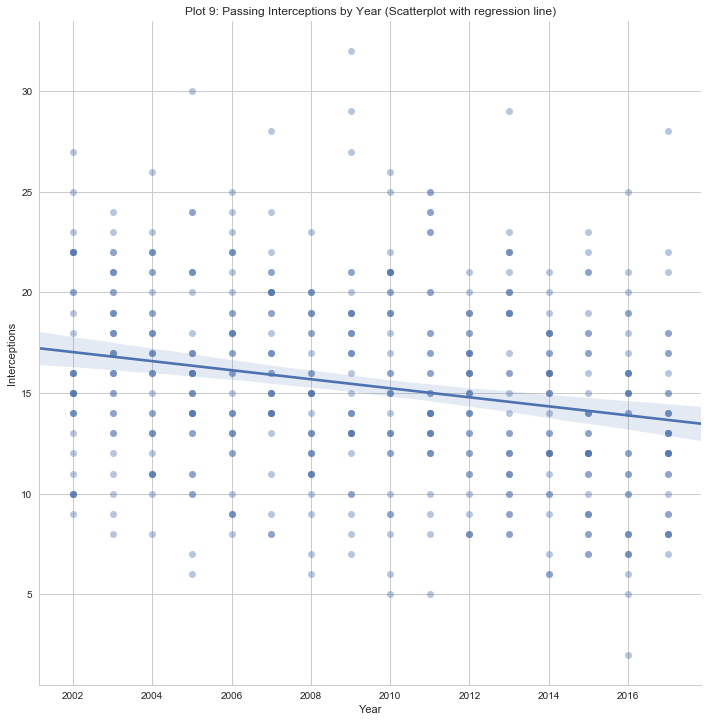

In [84]:
#So we have observed a trend towards yardage increases. One would guess more yards would equal more touchdowns
#One might also guess that more yards means more interceptions
#Let's take a look

g = sns.lmplot(y='TD',
               x='YEAR',
               data=df,
               size=10,
               fit_reg=True,
               scatter_kws={'alpha':0.4}) # Set points to semi-transparent to see overlaping points.
g.set_ylabels("Touchdowns")
g.set_xlabels("Year")
plt.title('Plot 8: Passing Touchdowns by Year (Scatterplot with regression line)')
plt.show()

g = sns.lmplot(y='Int', 
               x='YEAR',
               data=df,
               size=10,
               fit_reg=True, # The regression line also includes a 95% confidence envelope.
               scatter_kws={'alpha':0.4})
g.set_ylabels("Interceptions")
g.set_xlabels("Year")
plt.title('Plot 9: Passing Interceptions by Year (Scatterplot with regression line)')
plt.show()

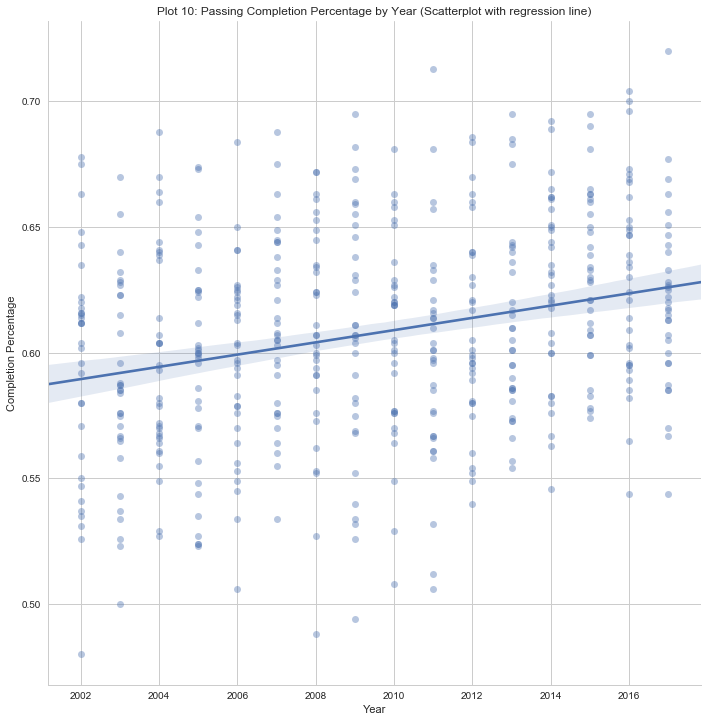

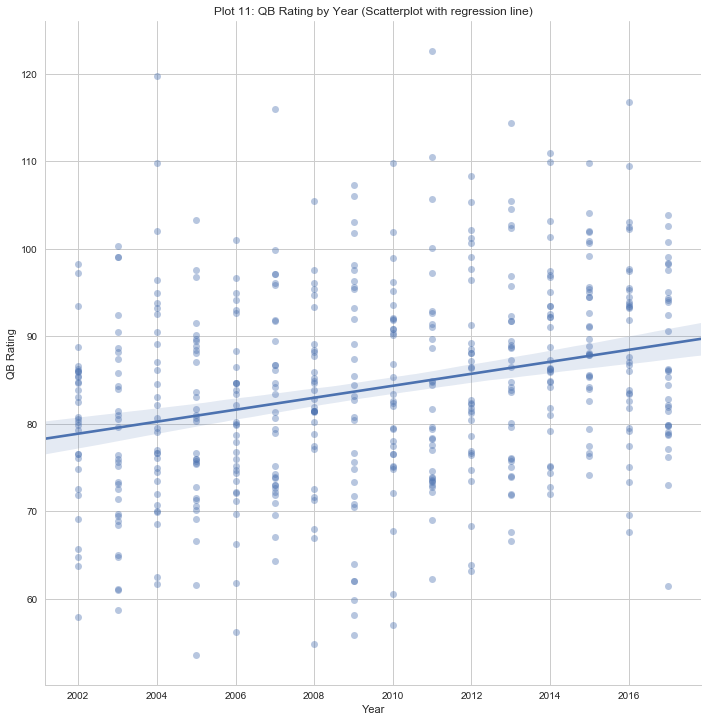

In [85]:
#This would confirm my first hypothesis that we're seeing more TDs
#But disproves my second hypothesis that more throwing leads to more interceptions

#Does this mean passing efficiency has increased over the last fifteen years?

#One way of showing this might be determining whether completion percentage and QB rating have increased in a similar
#manner to passing yards and TDs over the same time span

g = sns.lmplot(y='Pct',
               x='YEAR',
               data=df,
               size=10,
               fit_reg=True,
               scatter_kws={'alpha':0.4}) # Set points to semi-transparent to see overlaping points.
g.set_ylabels("Completion Percentage")
g.set_xlabels("Year")
plt.title('Plot 10: Passing Completion Percentage by Year (Scatterplot with regression line)')
plt.show()

g = sns.lmplot(y='QBR', 
               x='YEAR',
               data=df,
               size=10,
               fit_reg=True, # The regression line also includes a 95% confidence envelope.
               scatter_kws={'alpha':0.4})
g.set_ylabels("QB Rating")
g.set_xlabels("Year")
plt.title('Plot 11: QB Rating by Year (Scatterplot with regression line)')
plt.show()

In [ ]:
#This would seem to confirm what everyone is now saying about the NFL
#It truly is a passing league